## EXPLATORY DATA ANALYSIS

In [51]:
!pip install maidenhead pandas matplotlib numpy cartopy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------------- ---------------------- 4.7/11.0 MB 23.2 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 22.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 19.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 33.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 31.1 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   -------------------- ------------------- 2/4 [pyproj]
   -------------------- ------------------- 2/4 [pyproj]
   ------------------------------ --------- 3/4 [cartopy

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import maidenhead as mh
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [54]:
header = pd.read_pickle("../Data/Pre-Processed/header.pickle")

In [55]:
logs = pd.read_pickle("../Data/Pre-Processed/logs.pickle")

Lets have look at what header looks like

In [7]:
header.head()

,START-OF-LOG,CONTEST,CALLSIGN,LOCATION,CATEGORY-OPERATOR,CATEGORY-ASSISTED,CATEGORY-BAND,CATEGORY-POWER,CATEGORY-MODE,CATEGORY-TRANSMITTER,CATEGORY-STATION,CATEGORY-OVERLAY,GRID-LOCATOR,CLAIMED-SCORE,CREATED-BY,CATEGORY-TIME,OFFTIME
0,3.0,CQ-WW-CW,2E0CVN,DX,SINGLE-OP,NON-ASSISTED,ALL,LOW,CW,ONE,FIXED,NaN,IO80EM,626297,N1MM Logger+ 1.0.10530.0,NaN,NaN
1,3.0,CQ-WW-CW,2E0EBM,DX,SINGLE-OP,ASSISTED,ALL,LOW,CW,ONE,FIXED,NaN,JO01FQ,6837,N1MM Logger+ 1.0.10535.0,NaN,NaN
2,3.0,CQ-WW-CW,2E0FFT,DX,SINGLE-OP,NON-ASSISTED,ALL,QRP,CW,ONE,FIXED,NaN,JO01OC,1530,N1MM Logger+ 1.0.10530.0,NaN,NaN
3,3.0,CQ-WW-CW,2E0JID,DX,SINGLE-OP,ASSISTED,40M,LOW,CW,ONE,FIXED,NaN,IO81VV,1680,N1MM Logger+ 1.0.10525.0,NaN,NaN
4,3.0,CQ-WW-CW,2E0JLZ,DX,SINGLE-OP,ASSISTED,ALL,LOW,CW,ONE,FIXED,ROOKIE,IO81VV,155208,N1MM Logger+ 1.0.10530.0,NaN,NaN


Log looks like - 

In [8]:
logs.head()

,freq,mo,date,time,sent_call,sent_rst,sent_exch,rcvd_call,rcvd_rst,rcvd_exch,t
0,7056,CW,2024-11-23,0000,2E0CVN,599,14,HA1AG,599,15,NaN
1,7054,CW,2024-11-23,0001,2E0CVN,599,14,OM0WR,599,15,NaN
2,7050,CW,2024-11-23,0002,2E0CVN,599,14,VY2TT,599,05,NaN
3,7046,CW,2024-11-23,0003,2E0CVN,599,14,S56M,599,15,NaN
4,7046,CW,2024-11-23,0004,2E0CVN,599,14,DM4X,599,14,NaN


In [56]:
def count_QSO_logs(callsign):
    """
    Count the number of QSO logs for a given callsign.
    """
    return logs[logs['sent_call'] == callsign].shape[0]

print(count_QSO_logs(header['CALLSIGN'][0]))

1230


I will add a column to header df that will count the QSO rows for the entry has submitted -

In [ ]:
# DO NOT RUN AGAIN (after doing once) -----
count = []
for callsign in header['CALLSIGN']:
    count.append(count_QSO_logs(callsign))

header['QSO_COUNT'] = count
header_updated = header
header_updated.to_pickle("../Data/Pre-Processed/header_updated.pickle")

In [58]:
# read the updated header
header_updated = pd.read_pickle("../Data/Pre-Processed/header_updated.pickle")

Some columns have string lower, making corrections -

In [59]:
cols_to_upper = ['CATEGORY-ASSISTED','CATEGORY-POWER']
for col in cols_to_upper:
    header[col] = header[col].str.upper()

In [60]:
header_summary = header.describe(include='all')
print(header_summary)

       START-OF-LOG   CONTEST CALLSIGN LOCATION CATEGORY-OPERATOR  \
count          7961      7961     7961     7961              7961   
unique            1         1     7961       84                 2   
top             3.0  CQ-WW-CW     ZX9X       DX         SINGLE-OP   
freq           7961      7961        1     5823              7662   
mean            NaN       NaN      NaN      NaN               NaN   
std             NaN       NaN      NaN      NaN               NaN   
min             NaN       NaN      NaN      NaN               NaN   
25%             NaN       NaN      NaN      NaN               NaN   
50%             NaN       NaN      NaN      NaN               NaN   
75%             NaN       NaN      NaN      NaN               NaN   
max             NaN       NaN      NaN      NaN               NaN   

       CATEGORY-ASSISTED CATEGORY-BAND CATEGORY-POWER CATEGORY-MODE  \
count               7961          7961           7961          7961   
unique                 2     

Operations on header data - 

In [61]:
header_columns = list(header.columns)
print("Header columns:", header_columns)

Header columns: ['START-OF-LOG', 'CONTEST', 'CALLSIGN', 'LOCATION', 'CATEGORY-OPERATOR', 'CATEGORY-ASSISTED', 'CATEGORY-BAND', 'CATEGORY-POWER', 'CATEGORY-MODE', 'CATEGORY-TRANSMITTER', 'CATEGORY-STATION', 'CATEGORY-OVERLAY', 'GRID-LOCATOR', 'CLAIMED-SCORE', 'CREATED-BY', 'CATEGORY-TIME', 'OFFTIME']


In [64]:
categories_of_interest = ['CALLSIGN', 'LOCATION', 'CATEGORY-OPERATOR', 'CATEGORY-ASSISTED', 'CATEGORY-BAND', 'CATEGORY-POWER', 'CATEGORY-TRANSMITTER', 'CREATED-BY', 'GRID-LOCATOR', 'QSO_COUNT']

header_interest = header_updated[categories_of_interest]
print(header_interest.describe(include='all'))

       CALLSIGN LOCATION CATEGORY-OPERATOR CATEGORY-ASSISTED CATEGORY-BAND  \
count      7961     7961              7961              7961          7961   
unique     7961       84                 2                 3             7   
top        ZX9X       DX         SINGLE-OP          ASSISTED           ALL   
freq          1     5823              7662              4581          5566   
mean        NaN      NaN               NaN               NaN           NaN   
std         NaN      NaN               NaN               NaN           NaN   
min         NaN      NaN               NaN               NaN           NaN   
25%         NaN      NaN               NaN               NaN           NaN   
50%         NaN      NaN               NaN               NaN           NaN   
75%         NaN      NaN               NaN               NaN           NaN   
max         NaN      NaN               NaN               NaN           NaN   

       CATEGORY-POWER CATEGORY-TRANSMITTER                CREAT

Bar Plots for categories of interest-

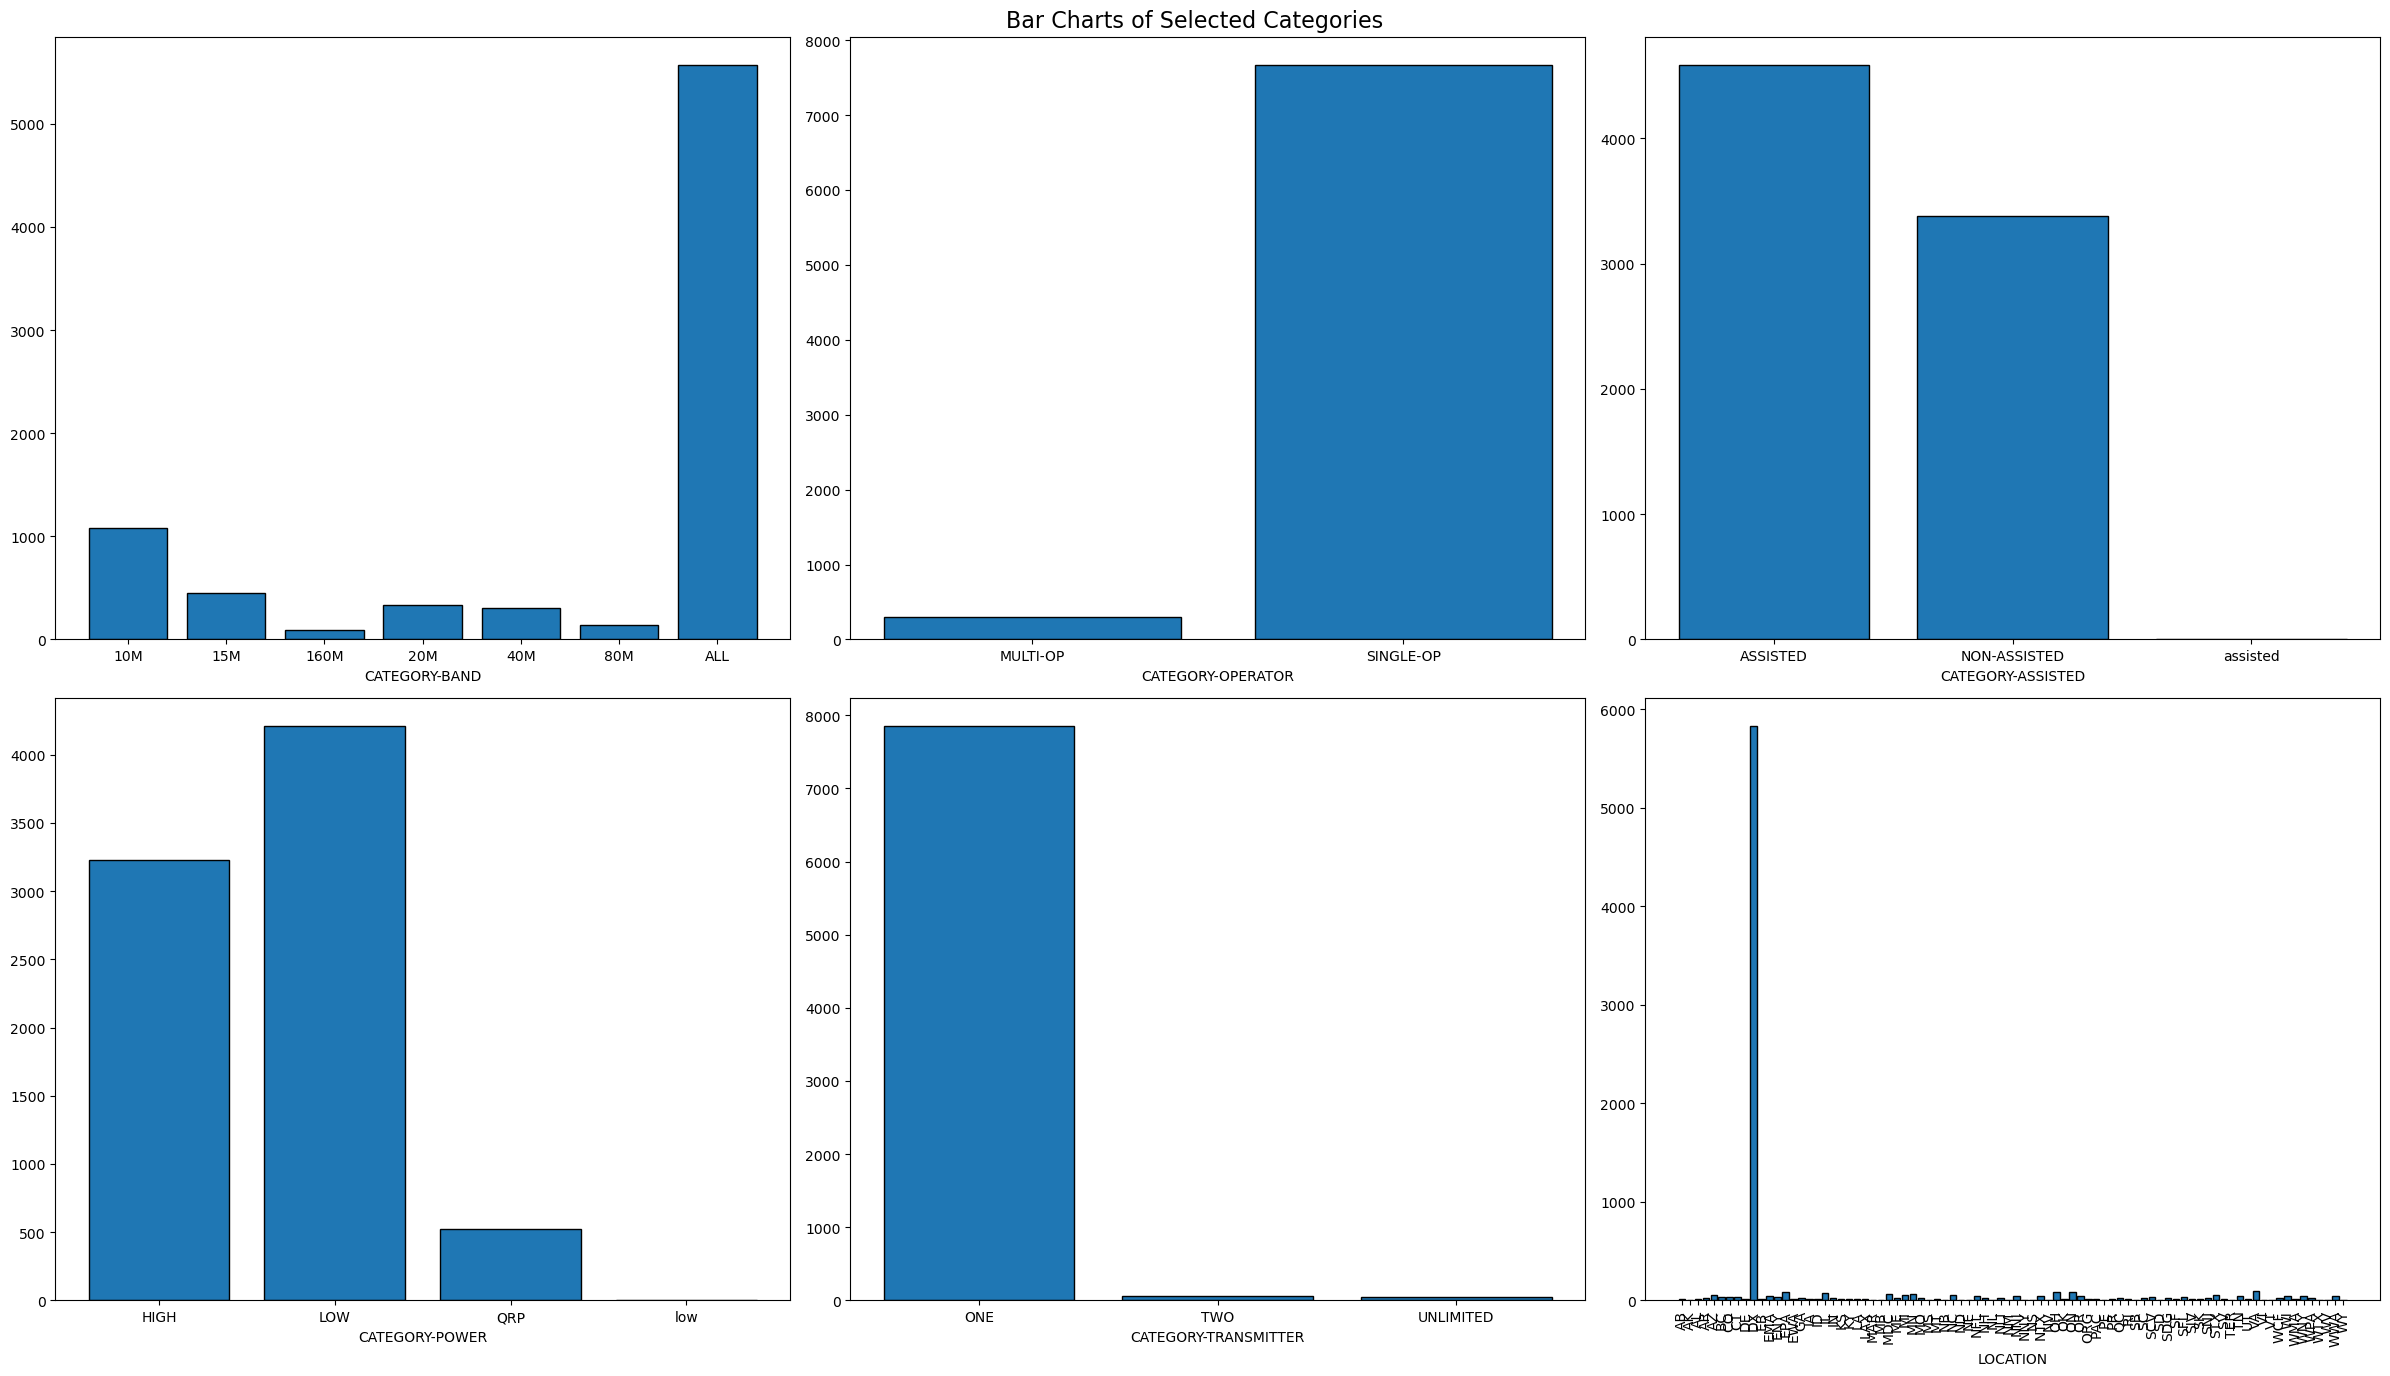

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(24, 14), sharey=False)

# Bar chart: CATEGORY-BAND
band_counts = header_interest['CATEGORY-BAND'].value_counts().sort_index()
axes[0, 0].bar(band_counts.index, band_counts.values, edgecolor='black')
axes[0, 0].set_xlabel('CATEGORY-BAND')

# Bar chart: CATEGORY-OPERATOR
operator_counts = header_interest['CATEGORY-OPERATOR'].value_counts().sort_index()
axes[0, 1].bar(operator_counts.index, operator_counts.values, edgecolor='black')
axes[0, 1].set_xlabel('CATEGORY-OPERATOR')

# Bar chart: CATEGORY-ASSISTED
assisted_counts = header_interest['CATEGORY-ASSISTED'].value_counts().sort_index()
axes[0, 2].bar(assisted_counts.index, assisted_counts.values, edgecolor='black')
axes[0, 2].set_xlabel('CATEGORY-ASSISTED')

# Bar chart: CATEGORY-POWER
power_counts = header_interest['CATEGORY-POWER'].value_counts().sort_index()
axes[1, 0].bar(power_counts.index, power_counts.values, edgecolor='black')
axes[1, 0].set_xlabel('CATEGORY-POWER')

# Bar chart: CATEGORY-TRANSMITTER
transmitter_counts = header_interest['CATEGORY-TRANSMITTER'].value_counts().sort_index()
axes[1, 1].bar(transmitter_counts.index, transmitter_counts.values, edgecolor='black')
axes[1, 1].set_xlabel('CATEGORY-TRANSMITTER')

# Bar chart: LOCATION (with rotation for readability)
location_counts = header_interest['LOCATION'].value_counts().sort_index()
axes[1, 2].bar(location_counts.index, location_counts.values, edgecolor='black')
axes[1, 2].set_xlabel('LOCATION')
axes[1, 2].tick_params(axis='x', rotation=90)

# Super title and layout
fig.suptitle('Bar Charts of Selected Categories', fontsize=16)
plt.tight_layout()
plt.show()

Geographic location of contestants using maidenhead grid locator - 

['IO80EM', 'JO01FQ', 'JO01OC', 'IO81VV', 'IO81VV', 'LG89RR', 'LG89UV', 'MH10QG', 'RH82RH', 'RH87MM', 'JM54IQ', 'OK30CW', 'JO72OX', 'DL90TP', 'PK04NO', 'PK04NP', 'PK04KU', 'PK04JU', 'PK04JU', 'LN50AM', 'LN21JR', 'LN21', 'LN22OA', 'LN12IG', 'LN21IR', 'JN92GL', 'NJ07BD', 'JN88EF', 'JN36BF', 'FN30AR', 'FM18LV', 'KM72LH', 'KM72KD', 'KM72JB', nan, 'KM72MS', 'KM72KG', 'KM72MS', 'KM72KE', 'KM71JX', nan, 'KM71HH', 'KM72MS', 'KM72JA', 'KM71GP', 'KM72MU', 'KM72KI', 'KM64HV', 'AH46CC', 'KJ60HD', 'PM37MO', 'FK08TG', 'OI33KS', 'OI33JT', 'OI52KW', 'OI71QL', 'OI33NP', 'OI62AE', nan, nan, 'PM95UG', nan, nan, 'PM95', nan, nan, nan, 'PM95SP', 'PM95OH', 'PM95VQ', 'PM95', nan, 'QM06HN', 'PM95XV', nan, 'PM95pp', 'PM95MO', 'PM95sp', nan, nan, 'PM95QX', nan, nan, 'JO65MN', 'JO67QS', 'PM95RQ', 'PM64XL', 'QM08KG', nan, 'MJ64ML', 'GJ06', 'JO99GD', 'JN85AO', 'JN95FQ', 'JN85BP', 'JN85AU', 'JN65TH', 'JN85OJ', 'JN75XT', 'JN85AT', 'JN95GM', 'JN75EI', 'JN85EI', 'JN95BF', 'JN95KG', 'JN65', 'JN75RP', 'JN75EI', 'JN86', '

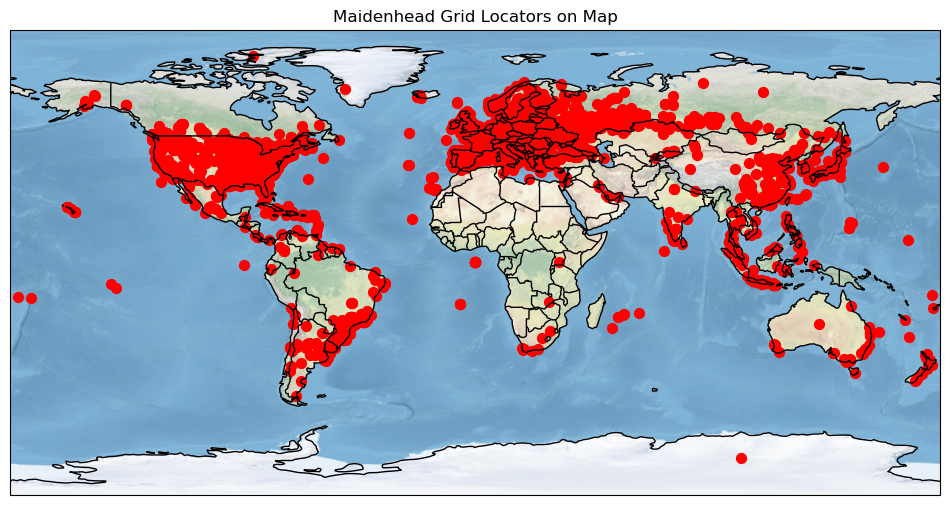

In [76]:
n= len(header_interest)

maidenhead_grid_locators = []

for i in range(n):
    maidenhead_grid_locators.append(header_updated['GRID-LOCATOR'][i])

print(maidenhead_grid_locators)

lat, lon = mh.to_location(maidenhead_grid_locators[0], center= True)
print(lat, lon)

lst1 = []
lst2 = []
for locator in maidenhead_grid_locators:
    if pd.isna(locator):
        print("Null locator")
    else:
        lat ,lon = mh.to_location(locator, center= True)
        lst1.append(lat)
        lst2.append(lon)

coords = list(zip(lst1, lst2))
#print(coords)

# Now to plotting on map

# Create map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

# Plot points
ax.scatter(lst2, lst1, color='red', marker='o', s=50, transform=ccrs.PlateCarree())

maidenhead_grid_locators_clean = [x for x in maidenhead_grid_locators if pd.notna(x)]



plt.title("Maidenhead Grid Locators on Map")
plt.show()
